<a href="https://colab.research.google.com/github/anahimaciel/Networks-in-cities/blob/main/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geopy.distance

import matplotlib.pyplot as plt
import plotly.express as px

import os

In [27]:
cities=[]
total_users=[]
sig_users=[]
res_users=[]
radius=[]
city_size=[]

for i in os.listdir("/content/drive/MyDrive/Networks in cities/Dados"):
  if(i=="Fortaleza" or i==".ipynb_checkpoints"):
    continue

  cities.append(i)

  file=open("/content/drive/MyDrive/Networks in cities/Dados/"+i+"/demo.txt",'r+')
  total_users.append(int(file.readline().split()[1])/1000)
  sig_users.append(int(file.readline().split()[2])/1000)
  file=open("/content/drive/MyDrive/Networks in cities/Dados/"+i+"/demo2.txt",'r+')
  res_users.append(int(file.readline().split()[3])/1000)

  df=pd.read_csv("/content/drive/MyDrive/Networks in cities/Dados/" +i+ "/results.txt")
  radius.append(float(df._get_value(len(df)-1,' total_distance')))

  df2=pd.read_csv("/content/drive/MyDrive/Networks in cities/Dados/" +i+ "/antennas_"+i+".txt", sep=";")
  #print(i+": "+str(len(df2))+" antenas")

  #CALCULATING DIAMETERS OF THE CITIES
  southernmost_point = df2.sort_values(by='LAT').iloc[0]
  northernmost_point = df2.sort_values(by='LAT', ascending=False).iloc[0]

  distance_NS = geopy.distance.geodesic((southernmost_point['LAT'], southernmost_point['LONG']), (northernmost_point['LAT'], northernmost_point['LONG'])).kilometers

  westernmost_point = df2.sort_values(by='LONG').iloc[0]
  easternmost_point = df2.sort_values(by='LONG', ascending=False).iloc[0]

  distance_EW = geopy.distance.geodesic((westernmost_point['LAT'], westernmost_point['LONG']), (easternmost_point['LAT'], easternmost_point['LONG'])).kilometers

  city_size.append((distance_NS+distance_EW)/2)
  print(i+": "+str((distance_NS+distance_EW)/2)+" km")

  #ONLY ANTENNAS WITH USERS LIVING THERE
  '''df3=pd.read_csv("/content/drive/MyDrive/Networks in cities/Dados/"+i+"/home_locations.txt")

  southernmost_point = df3.sort_values(by='LAT').iloc[0]
  northernmost_point = df3.sort_values(by='LAT', ascending=False).iloc[0]

  distance_NS = geopy.distance.geodesic((southernmost_point['LAT'], southernmost_point['LONG']), (northernmost_point['LAT'], northernmost_point['LONG'])).kilometers

  westernmost_point = df3.sort_values(by='LONG').iloc[0]
  easternmost_point = df3.sort_values(by='LONG', ascending=False).iloc[0]

  distance_EW = geopy.distance.geodesic((westernmost_point['LAT'], westernmost_point['LONG']), (easternmost_point['LAT'], easternmost_point['LONG'])).kilometers
  print(i+": "+str((distance_NS+distance_EW)/2)+" km")'''

Caucaia: 27.611816178519447 km
Franca: 10.966781984468057 km
Jundiaí: 18.525114045748055 km
Piracicaba: 24.54439424308739 km
Suzano: 19.014827044902358 km
Taubaté: 17.82998973031993 km
Mogi das Cruzes: 22.72532908365797 km
Montes Claros: 9.219501334426795 km
Ponta Grossa: 56.593213392103955 km
Rio Branco: 12.28893152144105 km


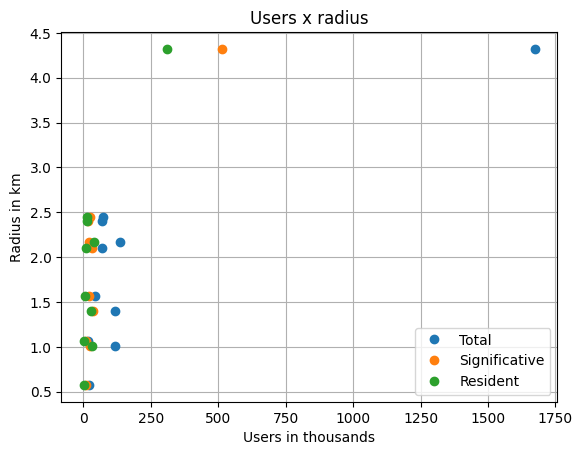

In [ ]:
# Plot
plt.plot(total_users, radius, 'o', label='Total')
plt.plot(sig_users, radius, 'o', label='Significative')
plt.plot(res_users, radius, 'o', label='Resident')

#labels for points
#for i in range(len(radius)):
#    plt.text(total_users[i], radius[i], cities[i], ha='right')
#    plt.text(sig_users[i], radius[i], cities[i], ha='right')
#    plt.text(res_users[i], radius[i], cities[i], ha='right')

# Customize plot
plt.xlabel('Users in thousands')
plt.ylabel('Radius in km')
plt.title('Users x radius')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

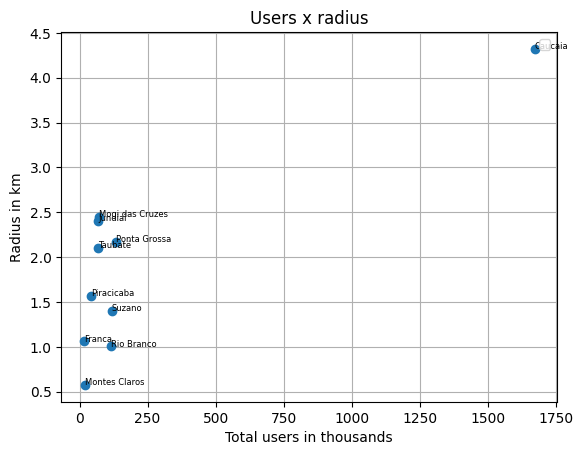

In [ ]:
# Plot
plt.plot(total_users, radius, 'o')

#labels for points
for i in range(len(radius)):
    plt.text(total_users[i], radius[i], cities[i], ha='left',fontsize=6)

# Customize plot
plt.xlabel('Total users in thousands')
plt.ylabel('Radius in km')
plt.title('Users x radius')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

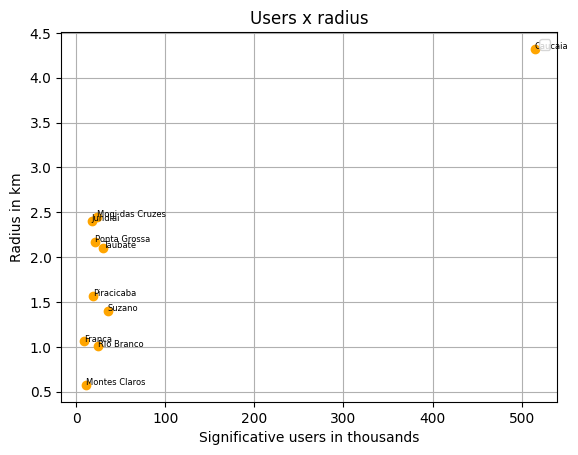

In [ ]:
# Plot
plt.plot(sig_users, radius, 'o',color="orange")

#labels for points
for i in range(len(radius)):
    plt.text(sig_users[i], radius[i], cities[i], ha='left',fontsize=6)

# Customize plot
plt.xlabel('Significative users in thousands')
plt.ylabel('Radius in km')
plt.title('Users x radius')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

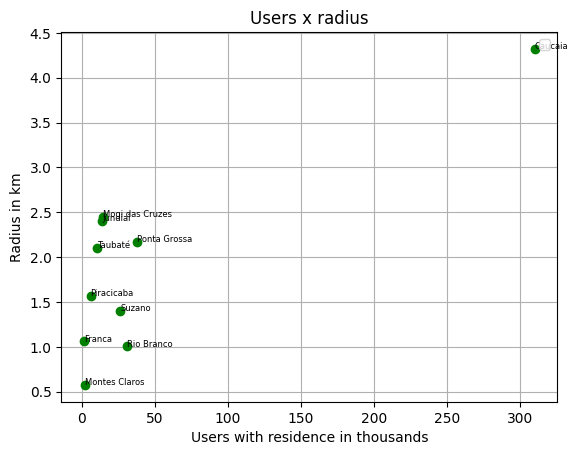

In [ ]:
# Plot
plt.plot(res_users, radius, 'o', color="green")

#labels for points
for i in range(len(radius)):
    plt.text(res_users[i], radius[i], cities[i], ha='left',fontsize=6)

# Customize plot
plt.xlabel('Users with residence in thousands')
plt.ylabel('Radius in km')
plt.title('Users x radius')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

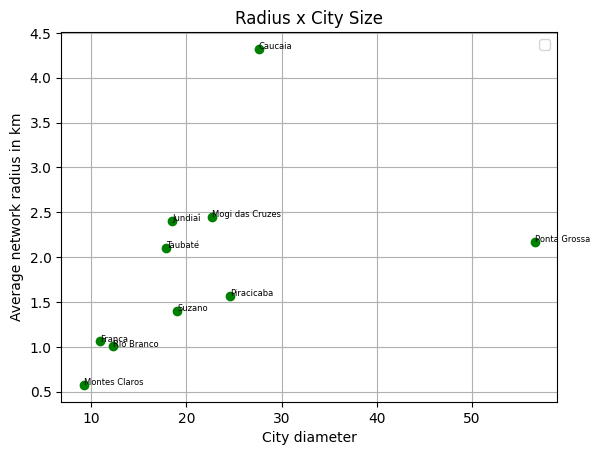

In [25]:
# Plot
plt.plot(city_size, radius, 'o', color="green")

#labels for points
for i in range(len(radius)):
    plt.text(city_size[i], radius[i], cities[i], ha='left',fontsize=6)

# Customize plot
plt.xlabel('City diameter')
plt.ylabel('Average network radius in km')
plt.title('Radius x City Size')
plt.legend()

# Show plot
plt.grid(True)
plt.show()